In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from generate_video import *

In [16]:
SEQ_LEN = 4

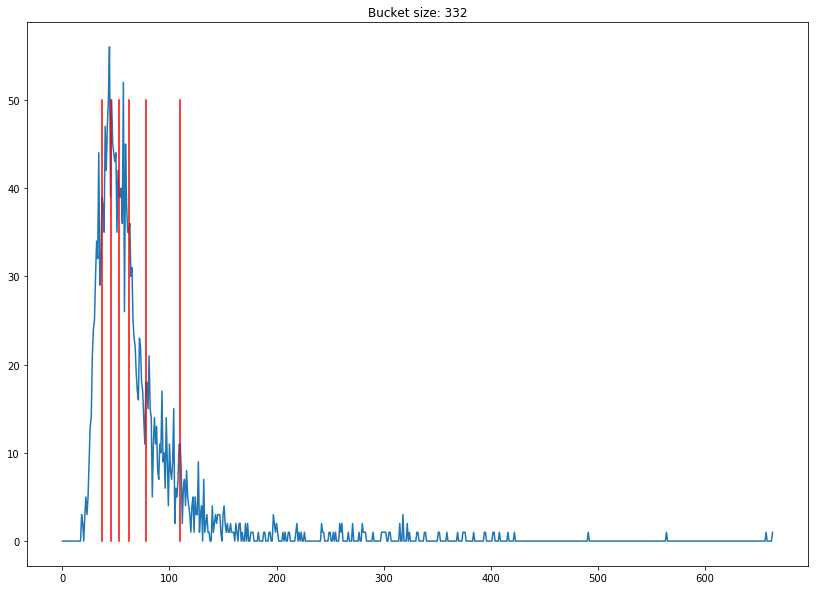

<bound method MultiVideoDataset.clear of <generate_video.MultiVideoDataset object at 0x7f3da01e5c50>>


In [27]:
dset = MultiVideoDataset(seqlen=SEQ_LEN, speedup=4, shuffle=False, bins=7, plot_buckets=True)
print(dset.clear)

In [28]:
(frames, mask_pafs, mask_heats), (pafs, heats), reset_flag = dset.next_batch(bsize=1)

print(frames[0].shape)
print(mask_pafs[0].shape, mask_heats[0].shape)
print(pafs[0].shape, heats[0].shape)

(4, 368, 368, 3)
(4, 46, 46, 38) (4, 46, 46, 19)
(4, 46, 46, 38) (4, 46, 46, 19)


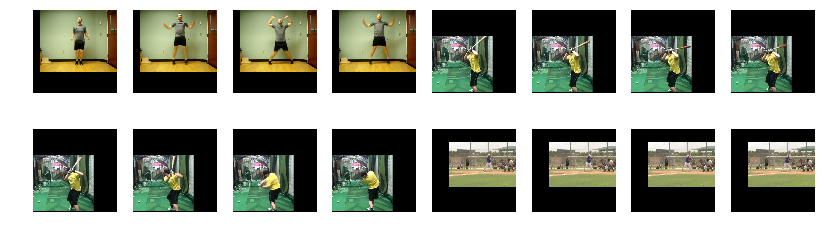

In [30]:
import matplotlib.pyplot as plt

# ensure augments behaves correctly

# dset.clear()
for vid in dset.streams: vid.reset()

plt.figure(figsize=(14, 4))
for ii in range(4):
    (frames, mask_pafs, mask_heats), (pafs, heats), reset = dset.next_batch(bsize=1)
    for sii in range(SEQ_LEN):
        plt.subplot(2, 8, ii*SEQ_LEN+sii+1)
        plt.axis('off')
        plt.imshow(cv2.cvtColor(frames[0][sii], cv2.COLOR_BGR2RGB))
#         plt.imshow(cv2)
plt.show()
plt.close()

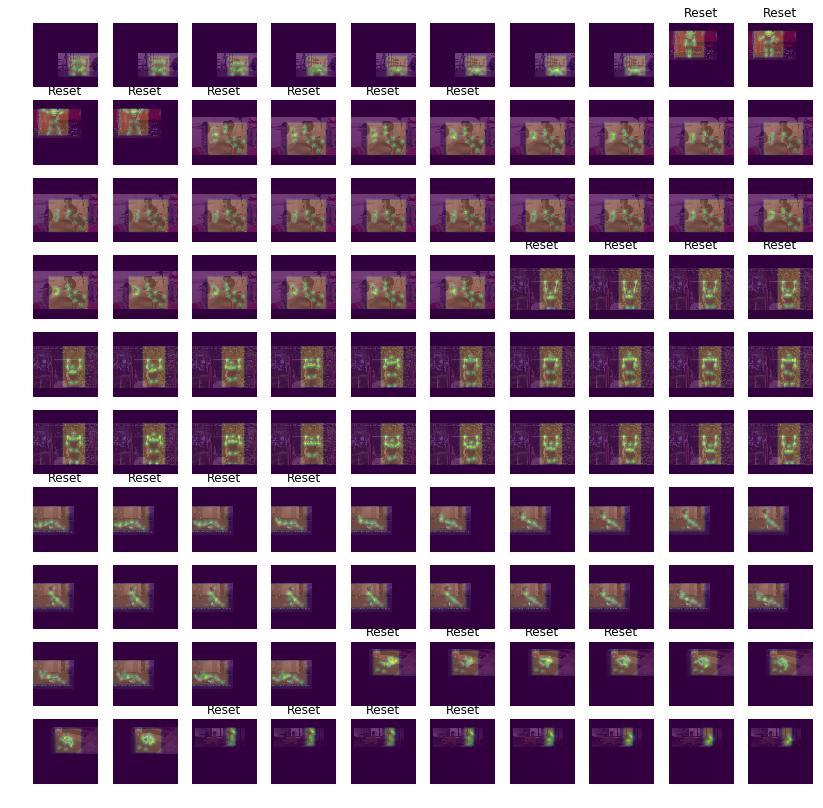

In [34]:
import matplotlib.pyplot as plt

# demonstrate that videos get played end-to-end

for video in dset.streams: video.reset()

plt.figure(figsize=(14, 14))
for ii in range(25):
    (frames, mask_pafs, mask_heats), (pafs, heats), reset = dset.next_batch(bsize=1)
    for sii in range(SEQ_LEN):
        plt.subplot(10, 10, ii*SEQ_LEN+sii+1)
        plt.gca().set_title('Reset' if  reset else '')
        plt.axis('off')
        plt.imshow(cv2.cvtColor(frames[0][sii], cv2.COLOR_BGR2RGB))
        mask = cv2.resize(mask_heats[0][sii][:, :, 0], (0,0), fx=8, fy=8)
        plt.imshow(mask.astype(np.float32), alpha=0.5)
        points = cv2.resize(np.sum(heats[0][sii][:, :, :-1].astype(np.float32), -1), (0,0), fx=8, fy=8)
        plt.imshow(points.astype(np.float32), alpha=0.5)
plt.show()
plt.close()

In [ ]:
# demonstrate that videos started in the same batch will share playback length

dset.clear()
# for video in dset.streams: video.reset()

plt.figure(figsize=(14, 14))
for ii in range(10):
  
    (frames, mask_pafs, mask_heats), (pafs, heats) = dset.next_batch(bsize=2)
    for jj in range(2):  
        for kk in range(SEQ_LEN):
            plt.subplot(10, 8, ii*8 + SEQ_LEN*jj + kk + 1)
            plt.imshow(cv2.cvtColor(frames[jj][kk], cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

In [26]:
import time
import os, sys
# measure bach time

hist = []
for ii in range(100):
    t0 = time.time()
    dset.next_batch(bsize=6)
    dt = time.time() - t0
    sys.stdout.write('%d: %.2f\r' % (ii, dt))
    hist.append(dt)
    sys.stdout.flush()

avg = np.mean(hist)
print(avg * 10000)
print(avg)

 [!] WARN: batch size changed!
9044.229650497437
0.9044229650497436


In [ ]:
maxiter = 100 * 100
for ii in range(maxiter):
    dset.next_batch(bsize=6)
    sys.stdout.write('%d/%d\r' % (ii+1, ))
    sys.stdout.flush()